<a href="https://colab.research.google.com/github/KaterynaSiniuta/ML-Hillel/blob/main/HW_8_Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**ДЗ 8. Decision tree**

Натренувати класифікатор на датасеті

https://archive.ics.uci.edu/ml/datasets/credit+approval

DecisionTreeClassifier

Провести всі етапи (підготовка, графічний аналіз, нові фічі....)

Додатково: порівняти із LogisticRegression і метричною моделлю

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
datasets_path = "/content/drive/MyDrive/Colab Notebooks/credit+approval/"
credit = pd.read_csv(datasets_path + "crx.data")

credit.head()

b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +

In [ ]:
!pip install category_encoders

In [ ]:
# Проведемо первинний аналіз даних датасету
print("Загальний опис датасету:", credit.info(), "\n")
print(credit.isna().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
Загальний опис датасету: None 

b        0
30.83    0
0        0
u        0
g        0
w        0
v        0
1.25     0
t        0
t.1      0
01       0
f        0
g

12 категоріальних фіч, додамо назви колонок

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)


In [ ]:
credit.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
credit.head()


A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g  00043  560   +
1  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  00280  824   +
2  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  00100    3   +
3  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  00120    0   +
4  b  32.08  4.000  u  g  m  v  2.50  t   f    0   t   g  00360    0   +

In [ ]:
credit.describe()

A3          A8         A11            A15
count  689.000000  689.000000  689.000000     689.000000
mean     4.765631    2.224819    2.402032    1018.862119
std      4.978470    3.348739    4.866180    5213.743149
min      0.000000    0.000000    0.000000       0.000000
25%      1.000000    0.165000    0.000000       0.000000
50%      2.750000    1.000000    0.000000       5.000000
75%      7.250000    2.625000    3.000000     396.000000
max     28.000000   28.500000   67.000000  100000.000000

In [ ]:
# Згідно опису датасету, деякі записи містят пусті значення. Порахуємо їх.
empty = credit[
    (credit["A1"] == "?") |
    (credit["A2"] == "?") |
    (credit["A4"] == "?") |
    (credit["A5"] == "?") |
    (credit["A6"] == "?") |
    (credit["A7"] == "?") |
    (credit["A14"] == "?")
]
empty.count()

A1     37
A2     37
A3     37
A4     37
A5     37
A6     37
A7     37
A8     37
A9     37
A10    37
A11    37
A12    37
A13    37
A14    37
A15    37
A16    37
dtype: int64

In [ ]:
#видалимо
credit = credit.drop(empty.index, axis=0)
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    object 
 1   A2      652 non-null    object 
 2   A3      652 non-null    float64
 3   A4      652 non-null    object 
 4   A5      652 non-null    object 
 5   A6      652 non-null    object 
 6   A7      652 non-null    object 
 7   A8      652 non-null    float64
 8   A9      652 non-null    object 
 9   A10     652 non-null    object 
 10  A11     652 non-null    int64  
 11  A12     652 non-null    object 
 12  A13     652 non-null    object 
 13  A14     652 non-null    object 
 14  A15     652 non-null    int64  
 15  A16     652 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.6+ KB


In [ ]:
# риведемо до належних типів дані у деяких колонках бо зараз вони мають не ті типи, що мають мати згідно опису датасету на сайті
credit = credit.astype(
    {
        "A2": "float64",
        "A14": "float64",
    },
)

credit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    object 
 1   A2      652 non-null    float64
 2   A3      652 non-null    float64
 3   A4      652 non-null    object 
 4   A5      652 non-null    object 
 5   A6      652 non-null    object 
 6   A7      652 non-null    object 
 7   A8      652 non-null    float64
 8   A9      652 non-null    object 
 9   A10     652 non-null    object 
 10  A11     652 non-null    int64  
 11  A12     652 non-null    object 
 12  A13     652 non-null    object 
 13  A14     652 non-null    float64
 14  A15     652 non-null    int64  
 15  A16     652 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.6+ KB


In [ ]:
# Тепер зробимо енкодінг категоріальних фічей
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in ["A1", "A9", "A10", "A12"]:
  credit[x] = le.fit_transform(credit[x])

In [ ]:
# Перекодуємо категоріальні значення таргету в цифрові + - для зручності
credit["A16"] = credit["A16"].map({"+": 1, "-": 0})

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    int64  
 1   A2      652 non-null    float64
 2   A3      652 non-null    float64
 3   A4      652 non-null    object 
 4   A5      652 non-null    object 
 5   A6      652 non-null    object 
 6   A7      652 non-null    object 
 7   A8      652 non-null    float64
 8   A9      652 non-null    int64  
 9   A10     652 non-null    int64  
 10  A11     652 non-null    int64  
 11  A12     652 non-null    int64  
 12  A13     652 non-null    object 
 13  A14     652 non-null    float64
 14  A15     652 non-null    int64  
 15  A16     652 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 86.6+ KB


In [ ]:
# Для фічі А4 бачимо 2 аутлейери зі значенням l2, тож можемо їх видалити
credit["A4"].value_counts()

credit["A4"] = le.fit_transform(credit["A4"])

credit.info()


<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    int64  
 1   A2      652 non-null    float64
 2   A3      652 non-null    float64
 3   A4      652 non-null    int64  
 4   A5      652 non-null    object 
 5   A6      652 non-null    object 
 6   A7      652 non-null    object 
 7   A8      652 non-null    float64
 8   A9      652 non-null    int64  
 9   A10     652 non-null    int64  
 10  A11     652 non-null    int64  
 11  A12     652 non-null    int64  
 12  A13     652 non-null    object 
 13  A14     652 non-null    float64
 14  A15     652 non-null    int64  
 15  A16     652 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 86.6+ KB


In [ ]:
credit["A5"] = le.fit_transform(credit["A5"])

credit.info()



<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      652 non-null    int64  
 1   A2      652 non-null    float64
 2   A3      652 non-null    float64
 3   A4      652 non-null    int64  
 4   A5      652 non-null    int64  
 5   A6      652 non-null    object 
 6   A7      652 non-null    object 
 7   A8      652 non-null    float64
 8   A9      652 non-null    int64  
 9   A10     652 non-null    int64  
 10  A11     652 non-null    int64  
 11  A12     652 non-null    int64  
 12  A13     652 non-null    object 
 13  A14     652 non-null    float64
 14  A15     652 non-null    int64  
 15  A16     652 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 86.6+ KB


In [ ]:
credit["A6"].value_counts()

A6
c     133
q      75
w      62
i      55
aa     52
ff     50
k      48
cc     40
m      38
x      36
d      26
e      24
j      10
r       3
Name: count, dtype: int64

In [ ]:
# Для A6 використаємо CatBoostEncoder
from category_encoders.cat_boost import CatBoostEncoder

cat_be = CatBoostEncoder(cols="A6")
credit = cat_be.fit_transform(credit, credit["A16"])
credit.head()

A1     A2     A3  A4  A5        A6 A7    A8  A9  A10  A11  A12 A13    A14  \
0   0  58.67  4.460   1   0  0.452454  h  3.04   1    1    6    0   g   43.0   
1   0  24.50  0.500   1   0  0.726227  h  1.50   1    0    0    0   g  280.0   
2   1  27.83  1.540   1   0  0.452454  v  3.75   1    1    5    1   g  100.0   
3   1  20.17  5.625   1   0  0.726227  v  1.71   1    0    0    0   s  120.0   
4   1  32.08  4.000   1   0  0.452454  v  2.50   1    0    0    1   g  360.0   

   A15  A16  
0  560    1  
1  824    1  
2    3    1  
3    0    1  
4    0    1

In [ ]:
credit["A7"].value_counts()

A7
v     380
h     137
ff     54
bb     53
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64

In [ ]:
# A7 James-Stein Encoder
from category_encoders.james_stein import JamesSteinEncoder

js = JamesSteinEncoder(cols="A7")
credit = js.fit_transform(credit, credit["A16"])

credit["A13"].value_counts()

A13
g    597
s     53
p      2
Name: count, dtype: int64

In [ ]:
# Прибираємо аутлайнери для А13
credit = credit.drop(credit[credit["A13"] == "p"].index, axis=0)

In [ ]:
credit["A13"] = le.fit_transform(credit["A13"])

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      650 non-null    int64  
 1   A2      650 non-null    float64
 2   A3      650 non-null    float64
 3   A4      650 non-null    int64  
 4   A5      650 non-null    int64  
 5   A6      650 non-null    float64
 6   A7      650 non-null    float64
 7   A8      650 non-null    float64
 8   A9      650 non-null    int64  
 9   A10     650 non-null    int64  
 10  A11     650 non-null    int64  
 11  A12     650 non-null    int64  
 12  A13     650 non-null    int64  
 13  A14     650 non-null    float64
 14  A15     650 non-null    int64  
 15  A16     650 non-null    int64  
dtypes: float64(6), int64(10)
memory usage: 86.3 KB


In [ ]:
sns.pairplot(credit, hue="A16");

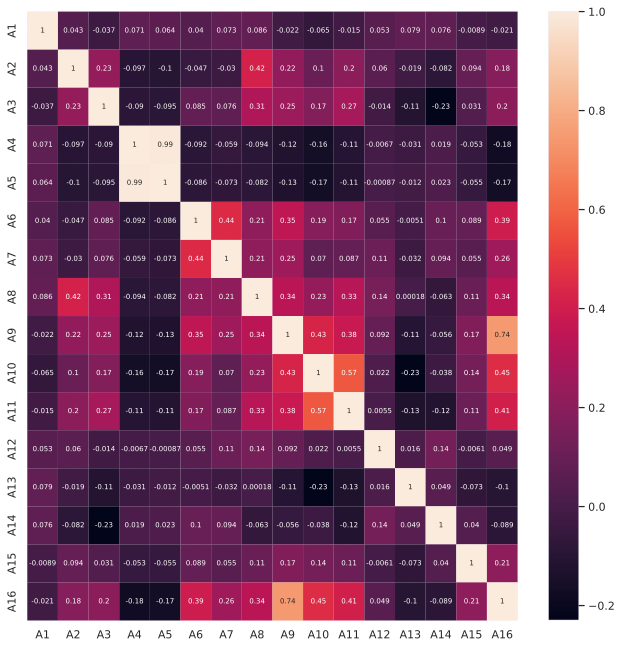

In [ ]:
# Побудуємо матрицю кореляції та хітмапу, щоб краще побачити які фічі і наскільки корелюють між собою
plt.figure(figsize = (11,11))
corr_matrix = credit.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"fontsize": 7});

фічі майже не корелюють між собою. Винятком є кореляція фічі А9 до таргету А16

In [ ]:
!pip install featuretools


In [ ]:
import featuretools as ft

# Создание EntitySet
es = ft.EntitySet(id="credit_data")

# Добавление credit DataFrame как таблицы
es = es.add_dataframe(
    dataframe_name="credit",
    dataframe=credit,
    index="index",  # Должен быть уникальный индексный столбец
    semantic_tags={
        "A1": "category",
        "A4": "category",
        "A5": "category",
        "A6": "numeric",  # Обрабатываем как числовой после кодирования
        "A7": "numeric",
        "A9": "category",
        "A10": "category",
        "A12": "category",
        "A13": "category",
        # A16 игнорируем, потому что это таргет
    }
)

# Определение фичей для игнорирования
ignore_variables = ["A16"]  # A16 - таргет, исключаем его

# Генерация новых фичей
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="credit",
    trans_primitives=["add_numeric", "multiply_numeric"],
    agg_primitives=["mean", "max", "min", "std"],
    max_depth=2,
    ignore_columns={"credit": ignore_variables}
)

# Вывод первых строк сгенерированных фичей
print(feature_matrix.head())


/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['max', 'mean', 'min', 'std']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


       A1     A2     A3  A4  A5        A6        A7    A8  A9  A10  ...  \
index                                                               ...   
0       0  58.67  4.460   1   0  0.452454  0.568651  3.04   1    1  ...   
1       0  24.50  0.500   1   0  0.726227  0.568651  1.50   1    0  ...   
2       1  27.83  1.540   1   0  0.452454  0.436060  3.75   1    1  ...   
3       1  20.17  5.625   1   0  0.726227  0.436060  1.71   1    0  ...   
4       1  32.08  4.000   1   0  0.452454  0.436060  2.50   1    0  ...   

       A5 * A6  A5 * A7  A5 * A8  A5 * A9   A6 * A7   A6 * A8   A6 * A9  \
index                                                                     
0          0.0      0.0      0.0      0.0  0.257288  1.375460  0.452454   
1          0.0      0.0      0.0      0.0  0.412970  1.089340  0.726227   
2          0.0      0.0      0.0      0.0  0.197297  1.696702  0.452454   
3          0.0      0.0      0.0      0.0  0.316678  1.241848  0.726227   
4          0.0      0.0 

In [ ]:
!pip install boruta


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Prepare the data for Boruta
X = feature_matrix
y = credit['A16']

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Define Boruta feature selector
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# Find all relevant features - 5 features should be selected
feat_selector.fit(X.values, y.values)

# Check selected features
print(feat_selector.support_)
print(feat_selector.ranking_)

# Get selected feature names
selected_features = X.columns[feat_selector.support_]

# Filter the feature matrix to keep only selected features
X_selected = X[selected_features]

# Now you can use X_selected with your machine learning model
print(f"Selected features: {selected_features}")


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	225
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	46
Tentative: 	60
Rejected: 	119
Iteration: 	9 / 100
Confirmed: 	46
Tentative: 	60
Rejected: 	119
Iteration: 	10 / 100
Confirmed: 	46
Tentative: 	60
Rejected: 	119
Iteration: 	11 / 100
Confirmed: 	46
Tentative: 	60
Rejected: 	119
Iteration: 	12 / 100
Confirmed: 	46
Tentative: 	46
Rejected: 	133
Iteration: 	13 / 100
Confirmed: 	46
Tentative: 	46
Rejected: 	133
Iteration: 	14 / 100
Confirmed: 	46
Tentative: 	46
Rejected: 	133
Iteration: 	15 / 100
Confirmed: 	46
Tentative: 	46
Rejected: 	133
Iteration: 	16 / 100
Confirmed: 	

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming 'X_selected' and 'y' are defined from the previous code

# Initialize the RandomForestClassifier (or your chosen model)
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Train the model
rf.fit(X_selected, y)

# Calculate permutation importance
result = permutation_importance(rf, X_selected, y, n_repeats=10, random_state=42, n_jobs=-1)

# Get importance scores and feature names
importance_scores = result.importances_mean
feature_names = X_selected.columns

# Create a DataFrame for easier handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Get the top 5 features
top_5_features = importance_df.head(5)

top_5_features


Feature  Importance
16  A14 + A2    0.012154
40  A14 * A4    0.009538
41  A14 * A9    0.009385
44   A3 * A9    0.006923
18  A15 + A2    0.006769

In [ ]:
from sklearn.model_selection import train_test_split

# Определяем целевую переменную
y = credit["A16"]  # Целевая переменная

# Определяем матрицу признаков (удаляем 'A16', чтобы не использовать ее в обучении)
X = credit.drop(columns=["A16"])

# Разбиваем на train и test (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размеры
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")


Размер X_train: (520, 15)
Размер X_test: (130, 15)
Размер y_train: (520,)
Размер y_test: (130,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score

# 1. Инициализируем RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)

# 2. Обучаем модель на тренировочных данных
rf.fit(X_train, y_train)

# 3. Делаем предсказания на тестовых данных
y_pred = rf.predict(X_test)

# 4. Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)  # F2-score

# 5. Выводим результаты
print(f"Accuracy: {accuracy:.4f}")
print(f"F2-score: {f2:.4f}")


Accuracy: 0.8769
F2-score: 0.9011


In [ ]:
# Добавляем новые фичи
credit["A14_plus_A2"] = credit["A14"] + credit["A2"]
credit["A14_mult_A4"] = credit["A14"] * credit["A4"]
credit["A14_mult_A9"] = credit["A14"] * credit["A9"]
credit["A3_mult_A9"] = credit["A3"] * credit["A9"]
credit["A15_plus_A2"] = credit["A15"] + credit["A2"]

# Проверяем результат
print(credit.head())

   A1     A2     A3  A4  A5        A6        A7    A8  A9  A10  ...  A12  A13  \
0   0  58.67  4.460   1   0  0.452454  0.568651  3.04   1    1  ...    0    0   
1   0  24.50  0.500   1   0  0.726227  0.568651  1.50   1    0  ...    0    0   
2   1  27.83  1.540   1   0  0.452454  0.436060  3.75   1    1  ...    1    0   
3   1  20.17  5.625   1   0  0.726227  0.436060  1.71   1    0  ...    0    1   
4   1  32.08  4.000   1   0  0.452454  0.436060  2.50   1    0  ...    1    0   

     A14  A15  A16  A14_plus_A2  A14_mult_A4  A14_mult_A9  A3_mult_A9  \
0   43.0  560    1       101.67         43.0         43.0       4.460   
1  280.0  824    1       304.50        280.0        280.0       0.500   
2  100.0    3    1       127.83        100.0        100.0       1.540   
3  120.0    0    1       140.17        120.0        120.0       5.625   
4  360.0    0    1       392.08        360.0        360.0       4.000   

   A15_plus_A2  
0       618.67  
1       848.50  
2        30.83  
3     

In [ ]:
from sklearn.model_selection import train_test_split

# Определяем целевую переменную
y = credit["A16"]  # Целевая переменная

# Определяем матрицу признаков (удаляем 'A16', чтобы не использовать ее в обучении)
X = credit.drop(columns=["A16"])

# Разбиваем на train и test (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверяем размеры
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер X_train: (520, 20)
Размер X_test: (130, 20)
Размер y_train: (520,)
Размер y_test: (130,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score

# 1. Инициализируем RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight="balanced", random_state=42)

# 2. Обучаем модель на тренировочных данных
rf.fit(X_train, y_train)

# 3. Делаем предсказания на тестовых данных
y_pred = rf.predict(X_test)

# 4. Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)  # F2-score

# 5. Выводим результаты
print(f"Accuracy: {accuracy:.4f}")
print(f"F2-score: {f2:.4f}")

Accuracy: 0.8846
F2-score: 0.9155


Спустя всего 2 часа времени мы добились 1% улучшения благодаря нереально крутому фичер инжинирингу уровня 2+2 2х2, ну будем надеяться что это 1% от миллиона долларов как минимум, так вернемся же к лесу

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

In [ ]:
# Тепер побудуємо DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [None, 10, 20, 50, 100, 1000],
        "min_samples_split": [2, 10, 20, 50, 100],
        "min_samples_leaf": [1, 10, 25, 50, 100],
        "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        "random_state": [42],
    },
)
grid_search.fit(x_valid, y_valid)

print("Результати тюнінгу гіперпараметрів для DecisionTreeClassifier:", "\n")
print("Найкращі параметри:", grid_search.best_params_,)
print("Найкращий score:", grid_search.best_score_, "\n")

# Навчаємо модель на тренувальних даних
dtree = grid_search.best_estimator_
dtree.fit(x_train, y_train)
predict = dtree.predict(x_test)

# Дивимось результати
print("Результати тренування моделі:")
print(classification_report(y_test, predict, target_names=["-", "+"]))

Результати тюнінгу гіперпараметрів для DecisionTreeClassifier: 

Найкращі параметри: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
Найкращий score: 0.8615384615384615 

Результати тренування моделі:
              precision    recall  f1-score   support

           -       0.87      0.77      0.82        71
           +       0.76      0.86      0.81        59

    accuracy                           0.82       130
   macro avg       0.82      0.82      0.82       130
weighted avg       0.82      0.82      0.82       130



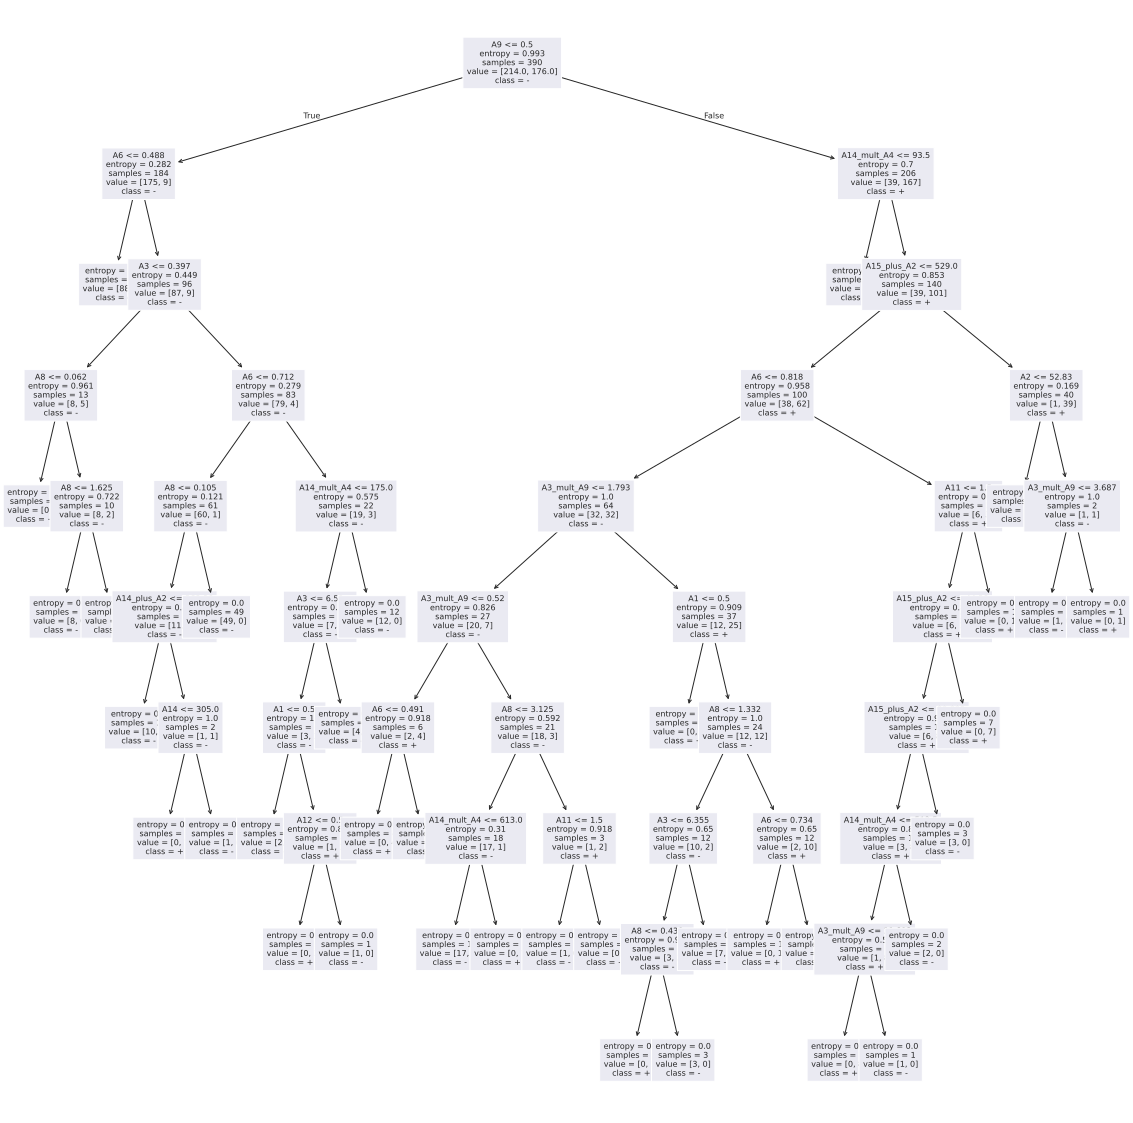

In [ ]:
# Подивимось на графічне представлення цього дерева
from sklearn import tree

plt.figure(figsize=(20, 20))
tree.plot_tree(dtree, feature_names=x_train.columns.to_list(), class_names=["-", "+"], fontsize=8)
plt.show()

